# Exploratory data analysis

http://patbaa.web.elte.hu/physdm/data/titanic.csv

On the link above you will find a dataset about the Titanic passengers. Your task is to explore the dataset.

Help for the columns:
 - SibSp - number of sibling/spouses on the ship
 - Parch - number of parent/children on the ship
 - Cabin - the cabin they slept in (if they had a cabin)
 - Embarked - harbour of entering the ship
 - Pclass - passenger class (like on trains)



#### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not. 
Impute the missing values in a sensible way:
 - if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense
 - if in a row almost all the entries is missing, it worth to remove that given row
 - if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). 
 
The imputing method affects different machine learning models different way, but now we are interested only in EDA, so try to keep as much information as possible!



#### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.



#### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!



#### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.

Which feature seems to play the most important role in surviving/not surviving? Explain how and why could that feature be important! 



#### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Number of records:",len(data))
data.isna().sum()

Number of records: 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing values

About the dataset, we know, that it contains 891 rows. Most of values in the columns are present, but we can observe that the age, cabin, and embarked columns contain missing values.
We can see, that the ratio of missing values varies in these columns : 20% of the data missing in the age column, ~80% of the cabin column is missing, and the embarked column is almost entirely intact.
<br><br>
So for the strategy to use here is to get rid of the Cabin column, because it is not very reliable, since most of it is missing. <br>With the Embarked column, which is mostly intact, I'll remove the records where the value is missing.
<br>For the Age column, I'm going to impute the missing values with the mean of the column.

In [4]:
data = data.drop(columns = ["Cabin"])
data = data[ data.Embarked.notna() ]
data["Age"] = data.Age.fillna(data.Age.mean())
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Heatmap
This figure indicates to us, that the majority of the first class survived the tragedy of Titanic, in the second class the number of those who survived and those who are dead is roughly the same, and the survival-ratio is the smallest within the passengers of the third class. <br>
We can conclude that the lower the class a passenger was associated with, the higher the chances of survival.

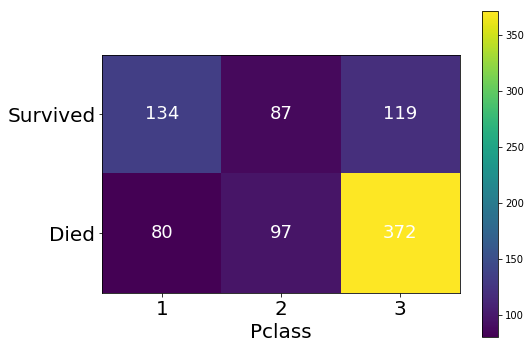

In [5]:
tags = ["Survived","Died"]
pclass = [1,2,3]

heatmap_matrix = [ [ data[data.Pclass  == x].Survived.sum() for x in pclass], 
                   [ data.Pclass.value_counts()[x] - data[data.Pclass  == x].Survived.sum() for x in pclass] ]
#first we take the number of survivals in each class by summing the associated column,
#then subtract it from the number of passengers in those classes

plt.figure(figsize=(8,6))
plt.imshow(heatmap_matrix)

plt.xticks(np.arange(len(pclass)), labels = pclass,size=20)
plt.yticks(np.arange(len(tags)), labels = tags,size=20)
plt.xlabel("Pclass",size=20)

for i in range(len(tags)):
    for j in range(len(pclass)):
        text = plt.text(j, i, heatmap_matrix[i][j],
                       ha="center", va="center", color="w", size = 18)
        #inputting text to each cell
        
plt.colorbar()

# Boxplot
On this figure we can see, that the passengers on the first class are generally older than the others, the second class is in the middle, and the third class is the youngest. This is in accordance with the mean ages of these classes.
<br> On the other hand, by imputing the missing data with the mean age ( ~ 29.6) we made it the most common age in every PClass. <br>
This figure is mostly based on the docs of seaborn: https://seaborn.pydata.org/generated/seaborn.boxplot.html

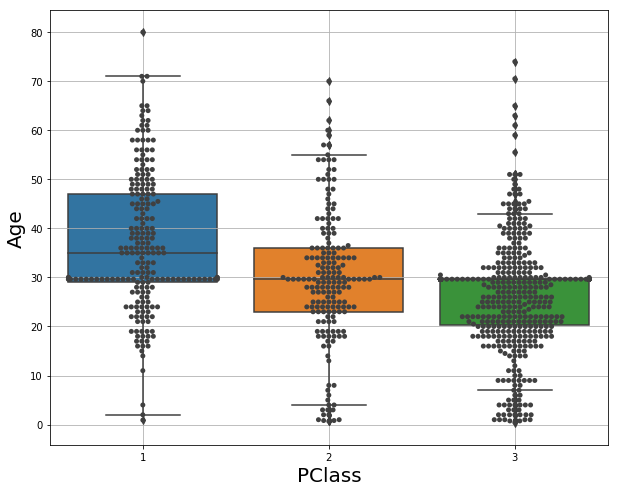

In [6]:
plt.figure(figsize=[10,8])
ax = sns.boxplot(data = ([data.Age[data.Pclass == x] for x in pclass]))
ax = sns.swarmplot(data=([data.Age[data.Pclass == x] for x in pclass]), size=5, color="0.25")
ax.set_xlabel("PClass",fontsize=20)
ax.set_ylabel("Age",fontsize=20)
ax.set(xticklabels=[1,2,3])
plt.grid()

# Correlation of the numerical columns

In [7]:
#calculating the correlation matrix
cols = ["Age","SibSp","Parch","Fare","Pclass"]
subdf = data[cols]
corr_matrix = subdf.corr()

corr_matrix

,Age,SibSp,Parch,Fare,Pclass
Age,1.000000,-0.231908,-0.178013,0.088780,-0.328256
SibSp,-0.231908,1.000000,0.414542,0.160887,0.081656
Parch,-0.178013,0.414542,1.000000,0.217532,0.016824
Fare,0.088780,0.160887,0.217532,1.000000,-0.548193
Pclass,-0.328256,0.081656,0.016824,-0.548193,1.000000


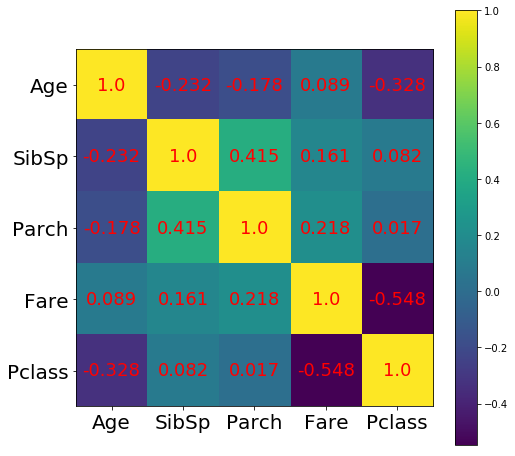

In [8]:
plt.figure(figsize=[8,8])
plt.imshow(corr_matrix)

plt.xticks(np.arange(len(cols)), labels = cols,size=20)
plt.yticks(np.arange(len(cols)), labels = cols,size=20)
for i in range(len(cols)):
    for j in range(len(cols)):
        text = plt.text(j, i, round(corr_matrix.at[cols[i],cols[j]],3),
                       ha="center", va="center", color="red", size = 18)
plt.colorbar()

This matrix shows us that there's a strong negative correlation between the fare that'd been paid and the passenger class, which is quite intuitive. The other thing we can see, is the same finding as in the previous exercise with the boxplots: the older the passenger, the lower the number of the associated passenger class. <br> <br>
Another statment can be made about families being present on the ship: by taking a look at the strong positive correlation between the number of parents and children and the number of siblings and spouses. 
Moreover, by the slight negative correlation between siblings and spouses and age, it can be stated, that most people, who had their family on board, were mostly younger than the rest.

# Extra plots
For further discussion of the statment made before, regarding the number of families on the ship, I'd like to add some more graphs.

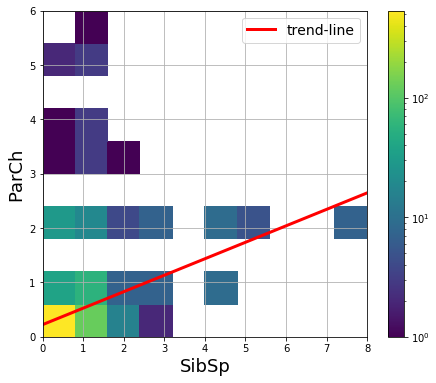

In [9]:
from matplotlib.colors import LogNorm
from numpy import polyfit

plt.figure(figsize=[16,6])
plt.subplot(121)
plt.hist2d(data.SibSp,data.Parch,norm = LogNorm())
p, q = polyfit(data.SibSp,data.Parch,1)
t = np.linspace(min(data.SibSp),max(data.SibSp),1000)
plt.plot(t,t*p+q,color="red",label="trend-line",lw = 3)

plt.legend(fontsize = 14)
plt.grid()
plt.xlabel("SibSp",size=18)
plt.ylabel("ParCh",size=18)
plt.colorbar()

On this graph we can see, that the majority of the passengers had no relatives on the ship, while those who did had mostly 2 or less parents and children  <br> (ParCh $\leq 2$) on board. This group of passengers supposedly consist of children - who can have up to 2 parents - and parents with 2 or less child. <br> The people who are ParCh $> 2$ are certainly parents with more than 2 children. Majority of them is traveling with their spouse, because in this region the SibSp $= 1$ column has lighter blue elements than the SibSp $= 0$ column. <br>
Given these presuppositions the trend-line is not as meaningful as I first thought. Its main purpose is to shed light on the slight positive correlation between ParCh and SibSp, that was mentioned in the previous exercise.